## Explporatory Data Analysis

## The Banking Dataset

In [ ]:
Objectives:
This project seeks to explore the Banking dataset in order to deduce the 
following points.     
1. What is the share of clients attracted in the source data?
2. What are the mean values of numerical features among the attracted clients?
3. What is the average call duration for the attracted clients?
4. What is the average age among the attracted and unmarried clients?
5. What is the average age and call duration for different types of client employment?

In [ ]:
In answering the above questions, preparations for the processing of the data tp be used 
would be done first.

# Import Libraries

In [ ]:
The libraries to be used are imported into the jupyter notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
The dataset is being sourced from 
https://archive.ics.uci.edu/dataset/222/bank+marketing
The data set to be analysed is also imported into the jupyter notebook, checking also if the 
data set is imported correctly into the note notebook by viewing the first five rows and the 
last five rows. Also the totalnumber of rows and columns are gotten to see the size of the data set.

In [2]:
# importing the dataset
bank=pd.read_csv('bank-additional.csv', sep = ';')
                 
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
bank.shape
bank.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [40]:
bank.shape

(4119, 21)

In [ ]:
All the columns are listed out to see all the names and determine which is relevant and which is not

In [41]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
the datatypes for all columns are also gotten to abreast ourselveswith the types of the dataset being used

In [43]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
We use the .info syntax to view the general info of the dataset, to have a general view of the whole 
dataset. from the info gotten we can see dtypes: float64(5), int64(5), object(11)

In [44]:
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [ ]:
We also view the statistical characteristics of the dataset for each numerical
value by using the .describe syntax. This will show the existing value numbers, mean,
standard deviation, range, min & max, 0.25, 0.5 and 0.75 quartiles. 

In [45]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
Since we have different object types in the data set, and not all is captured in the .describe 
analysis since they are non numerical types, it is important to include the non numerical types 
in the analysis by using the 'include objects'

In [46]:
bank.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


In [ ]:
We can also sort out seperately to see the statistical analysis for floats

In [71]:
bank.describe(include = ["float64"])

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,1.563114,0.579349,4.594578,1.733591,73.667904
min,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
We can also sort out seperately to see the statistical analysis for integers

In [72]:
bank.describe(include = ["int64"])

,age,duration,campaign,pdays,previous,y
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.109493
std,10.313362,254.703736,2.568159,191.922786,0.541788,0.312294
min,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,0.000000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,0.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,0.000000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.000000


In [ ]:
The general value counts for the data set is gotten by using the .value_counts

In [47]:
bank["y"].value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [ ]:
The .value_counts is used to view the client distribution based on a particular variable eg marital.
This helps in planning the distribution of campaign and adverts targeting this large groups
as married people show to be the largest with over 60% of the targeted population.

In [48]:
bank["marital"].value_counts(normalize = True)

married     0.609128
single      0.279922
divorced    0.108279
unknown     0.002671
Name: marital, dtype: float64

In [ ]:
Sorting is done to see the distribution of details inherent in the dataset. This shows fridays to 
be the busiest days as calls exceed 2 minnutes   

In [49]:
bank.sort_values(by = "duration", ascending = False).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2231,31,technician,married,professional.course,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
1546,46,admin.,divorced,high.school,no,yes,no,telephone,oct,fri,...,1,999,0,nonexistent,-0.1,93.798,-40.4,5.045,5195.8,no
1392,47,admin.,divorced,university.degree,no,yes,no,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,yes
1685,33,blue-collar,single,high.school,no,no,no,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,yes
3266,49,blue-collar,married,basic.6y,no,yes,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,yes


In [ ]:
Sorting by a group, shows the the distrubution by a chosen parameter based on the group, this 
shows that 

In [50]:
bank.sort_values(by = ["age", "duration"], ascending = [True, False]).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
477,18,student,single,unknown,no,no,no,cellular,sep,thu,...,1,3,1,success,-3.4,92.379,-29.8,0.809,5017.5,yes
899,18,student,single,unknown,no,yes,yes,telephone,aug,wed,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.900,4991.6,no
1661,18,student,single,unknown,no,yes,no,cellular,may,thu,...,1,7,2,success,-1.8,93.876,-40.0,0.677,5008.7,no
1887,19,student,single,high.school,unknown,yes,no,cellular,may,tue,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no
3268,20,blue-collar,single,high.school,no,yes,no,cellular,may,wed,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no


In [ ]:
Applying fuctions to see distinct variables eg the max ,mean or average. Here the oldest person 
here is 88 years,most comon month is September, most common form of communication is the the 
telephone and the highest times a client has been engaged is 35  

In [51]:
bank.apply(np.max)

age                      88
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               3643
campaign                 35
pdays                   999
previous                  6
poutcome            success
emp.var.rate            1.4
cons.price.idx       94.767
cons.conf.idx         -26.9
euribor3m             5.045
nr.employed          5228.1
y                       yes
dtype: object

In [52]:
d = {"no": 0, "yes": 1}
bank["y"] = bank["y"].map(d)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


# 1. What is the share of clients attracted in our source data?

In [ ]:
The share of attracted customers stands at 11%

In [53]:
print("Share of attracted clients =", '{:.1%}'.format(bank["y"].mean()))

Share of attracted clients = 10.9%


# 2. What are the mean values of numerical features among the attracted clients?

In [ ]:
From the mean values, average age stands at 42 years,average calls to attract them is 2 mins

In [27]:
bank[bank["y"] == 1].mean()

age                 41.889135
duration           560.787140
campaign             1.980044
pdays              778.722838
previous             0.585366
emp.var.rate        -1.177384
cons.price.idx      93.417268
cons.conf.idx      -39.786475
euribor3m            2.145448
nr.employed       5093.118625
y                    1.000000
dtype: float64

# 3. What is the average call duration for the attracted clients?

In [ ]:
The average call duration to attract a client successfully is 9 minutes 20 seconds

In [54]:
acd = round(bank[bank["y"] == 1]["duration"].mean(), 2)
acd_in_min = acd // 60
print("Average call duration for attracted clients =", acd_in_min, "min", int(acd) % 60, "sec")

Average call duration for attracted clients = 9.0 min 20 sec


# 4. What is the average age among the attracted and unmarried clients?

In [ ]:
Using the (y==1) for successful attracted clients and marital status as single, the average age of 
successful clients who are unmarrried is 32 years

In [55]:
print("Average age of attracted clients =", int(bank[(bank["y"] == 1) & (bank["marital"] == "single")]["age"].mean()), "years")

Average age of attracted clients = 32 years


# 5. What is the average age and call duration for different types of client employment?

In [56]:
bank[-1:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.2,-42.0,4.12,5195.8,0


In [57]:
# PIVOT TABLES
pd.crosstab(bank["y"], bank["marital"])

marital,divorced,married,single,unknown
y,,,,
0,403,2257,998,10
1,43,252,155,1


In [58]:
pd.crosstab(bank["y"],
bank["marital"],
normalize = 'index')

marital,divorced,married,single,unknown
y,,,,
0,0.109869,0.615322,0.272083,0.002726
1,0.095344,0.558758,0.343681,0.002217


In [59]:
bank.pivot_table(
["age", "duration"],
["job"],
aggfunc = "mean",
).head(10)

,age,duration
job,,
admin.,38.240119,261.871542
blue-collar,39.265837,261.852941
entrepreneur,42.202703,249.202703
housemaid,45.672727,229.663636
management,42.429012,246.799383
retired,60.873494,311.789157
self-employed,40.679245,254.924528
services,38.513995,232.529262
student,26.695122,287.134146


In [ ]:
# visualizations in PANDAS

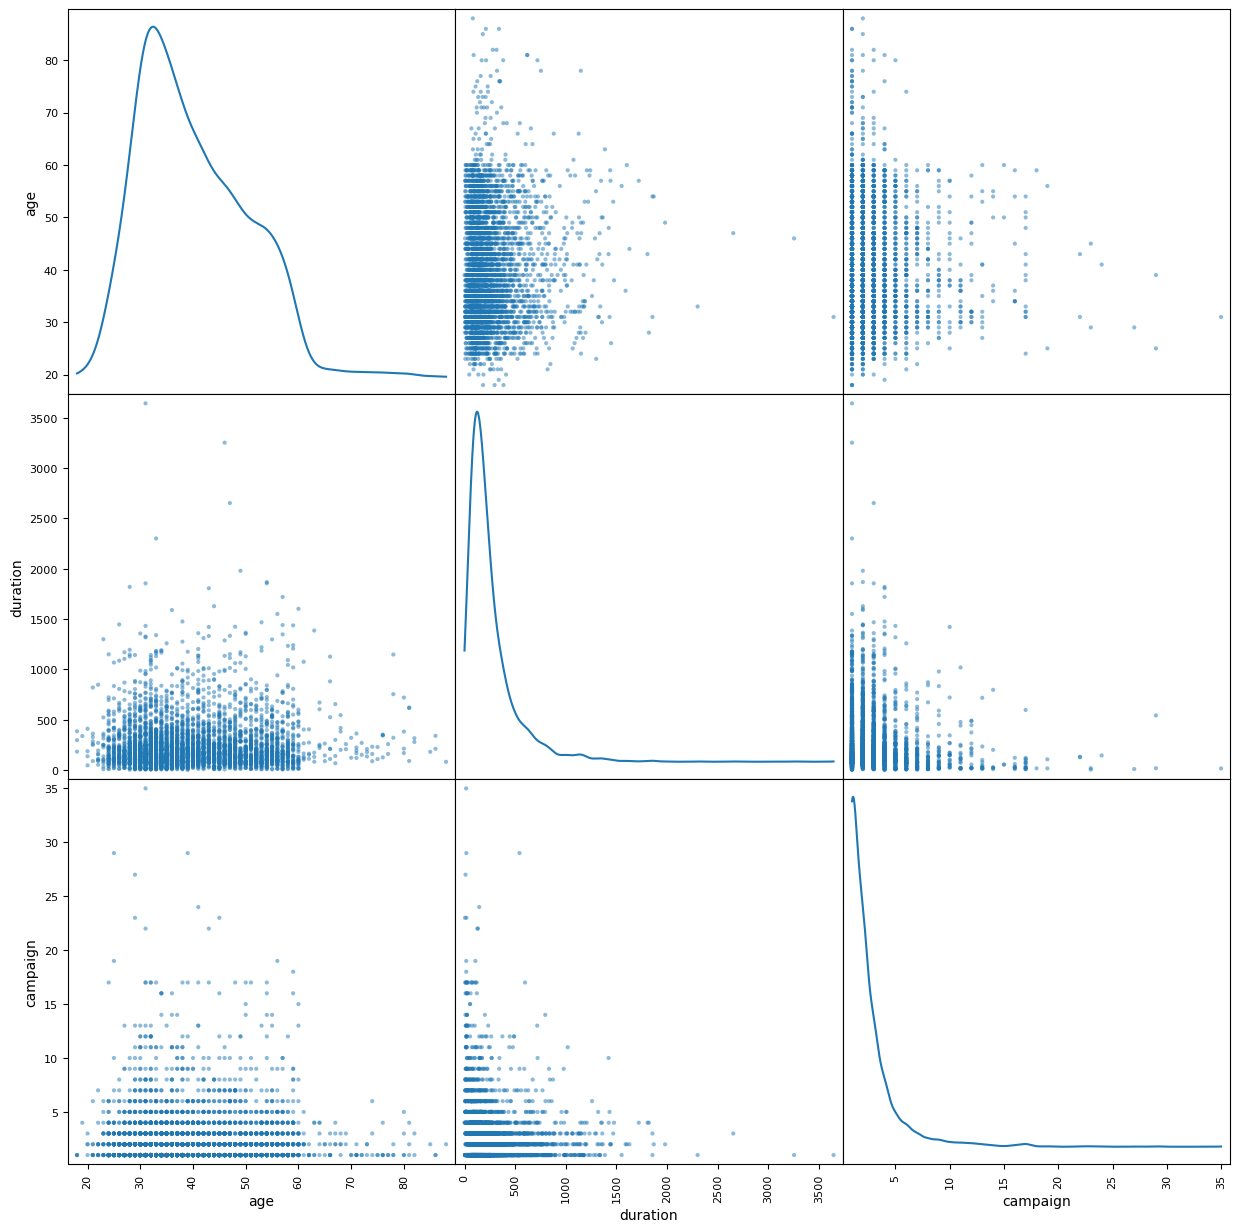

In [63]:
pd.plotting.scatter_matrix(
   bank[["age", "duration", "campaign"]],
   figsize = (15, 15),
   diagonal = "kde")
plt.show()

In [ ]:
from the above three plot graph, one can see that by comparing the scatter plot for age and duration, its obvious that as age
increases thre duration increases but not ata significant amount as the duration doesn't really cross the have a significant 
increase, the ages from 25-60 has more concentration of the duration, while after that sameage range starts to sparce out for 
between 500-1000. there seems to bea great number of outliers for ages above 80 years and duration of above 3000.
The scatter plot for age and campaign has the same derivative plot,with most of the campaings centered ages between 25-60 
but the campaigns lasting well beyound the 10 calls mark. This also has outliers which lay beyound the 80 years mark for ages
and over the 30 calls marks for campaigns. 
This goes to show that for duration and campaigns the target age bracket should be those between the ages 25 to 55 to be 
successful.

<Axes: >

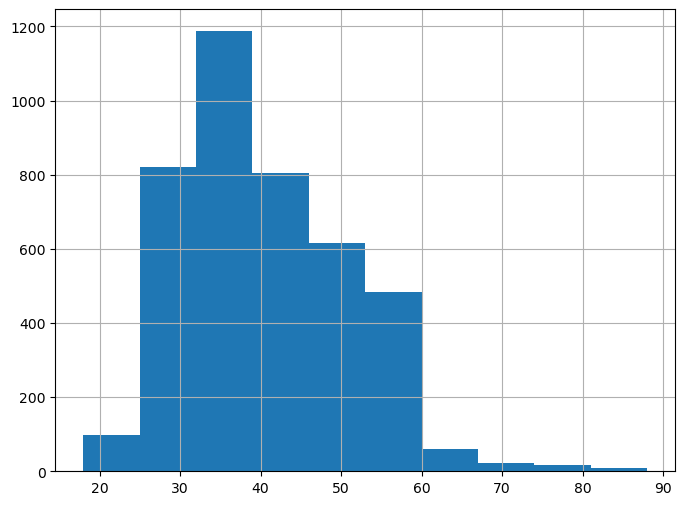

In [64]:
bank["age"].hist()

In [ ]:
The histogram for age clearly shows the earlier postulation that majority of the clients who are willing to respond to the 
advert are between the ages 25 - 60, with the peak respondents at age 35 

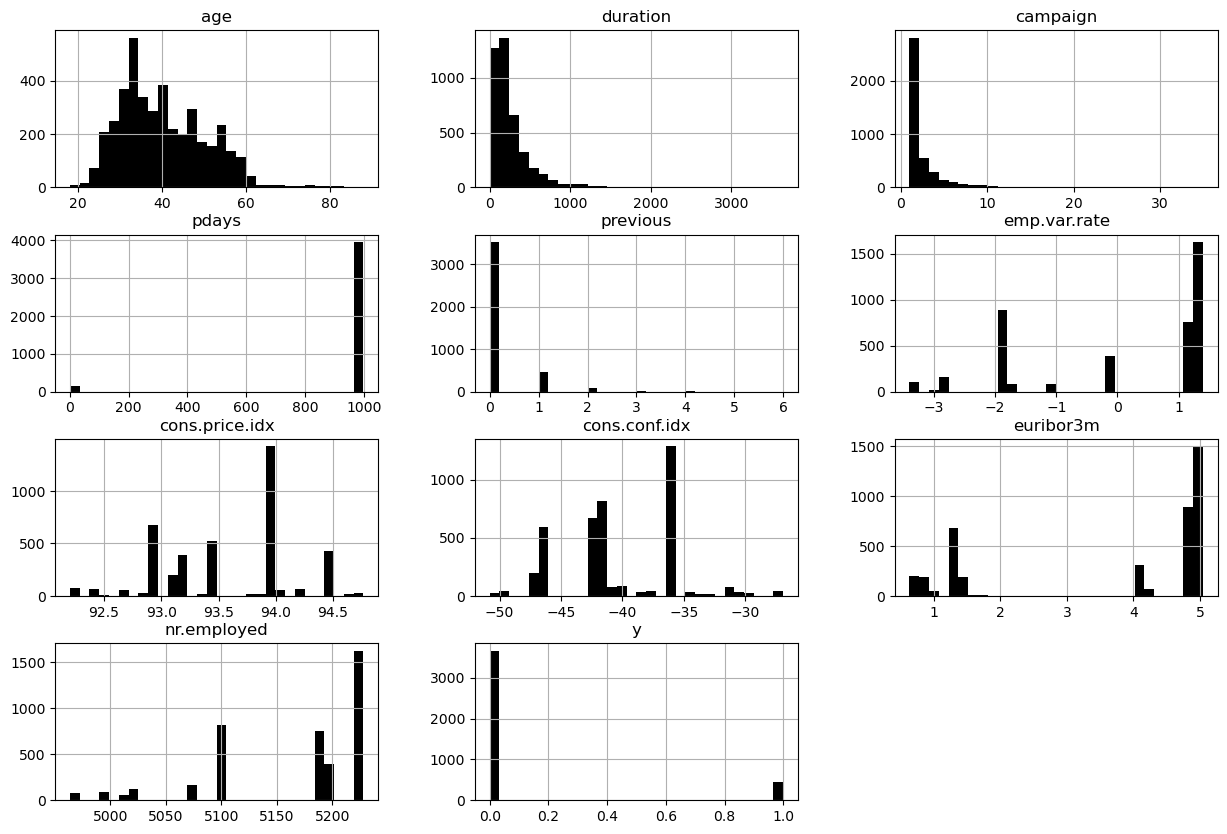

In [65]:
bank.hist(color = "k",
bins = 30,
figsize = (15, 10))
plt.show()

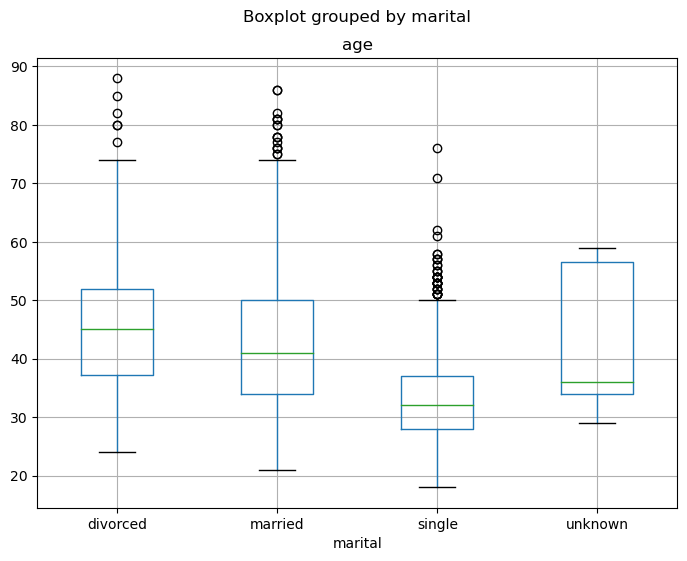

In [66]:
bank.boxplot(column = "age",
by = "marital")
plt.show()

In [ ]:
The box plot of the age and marital status of respondents show that mean age fpr for divorced-45, married-41, single-32, 
unknown-36. the singles have the lowest mean age group. the ranges fro each group are divorced-38 to 51, married-53 to 50, 
single-28 to 38, unknown-34 to 55. The lower quartiles for rthe groups are as follows divorced-25, married-21, single-18, 
unknown-29. The upper quartiles for rthe groups are as follows divorced-73, married-73, single-50, 
unknown-58. The outliears for divorced, married and single all lie beyound the 70 years age mark. 

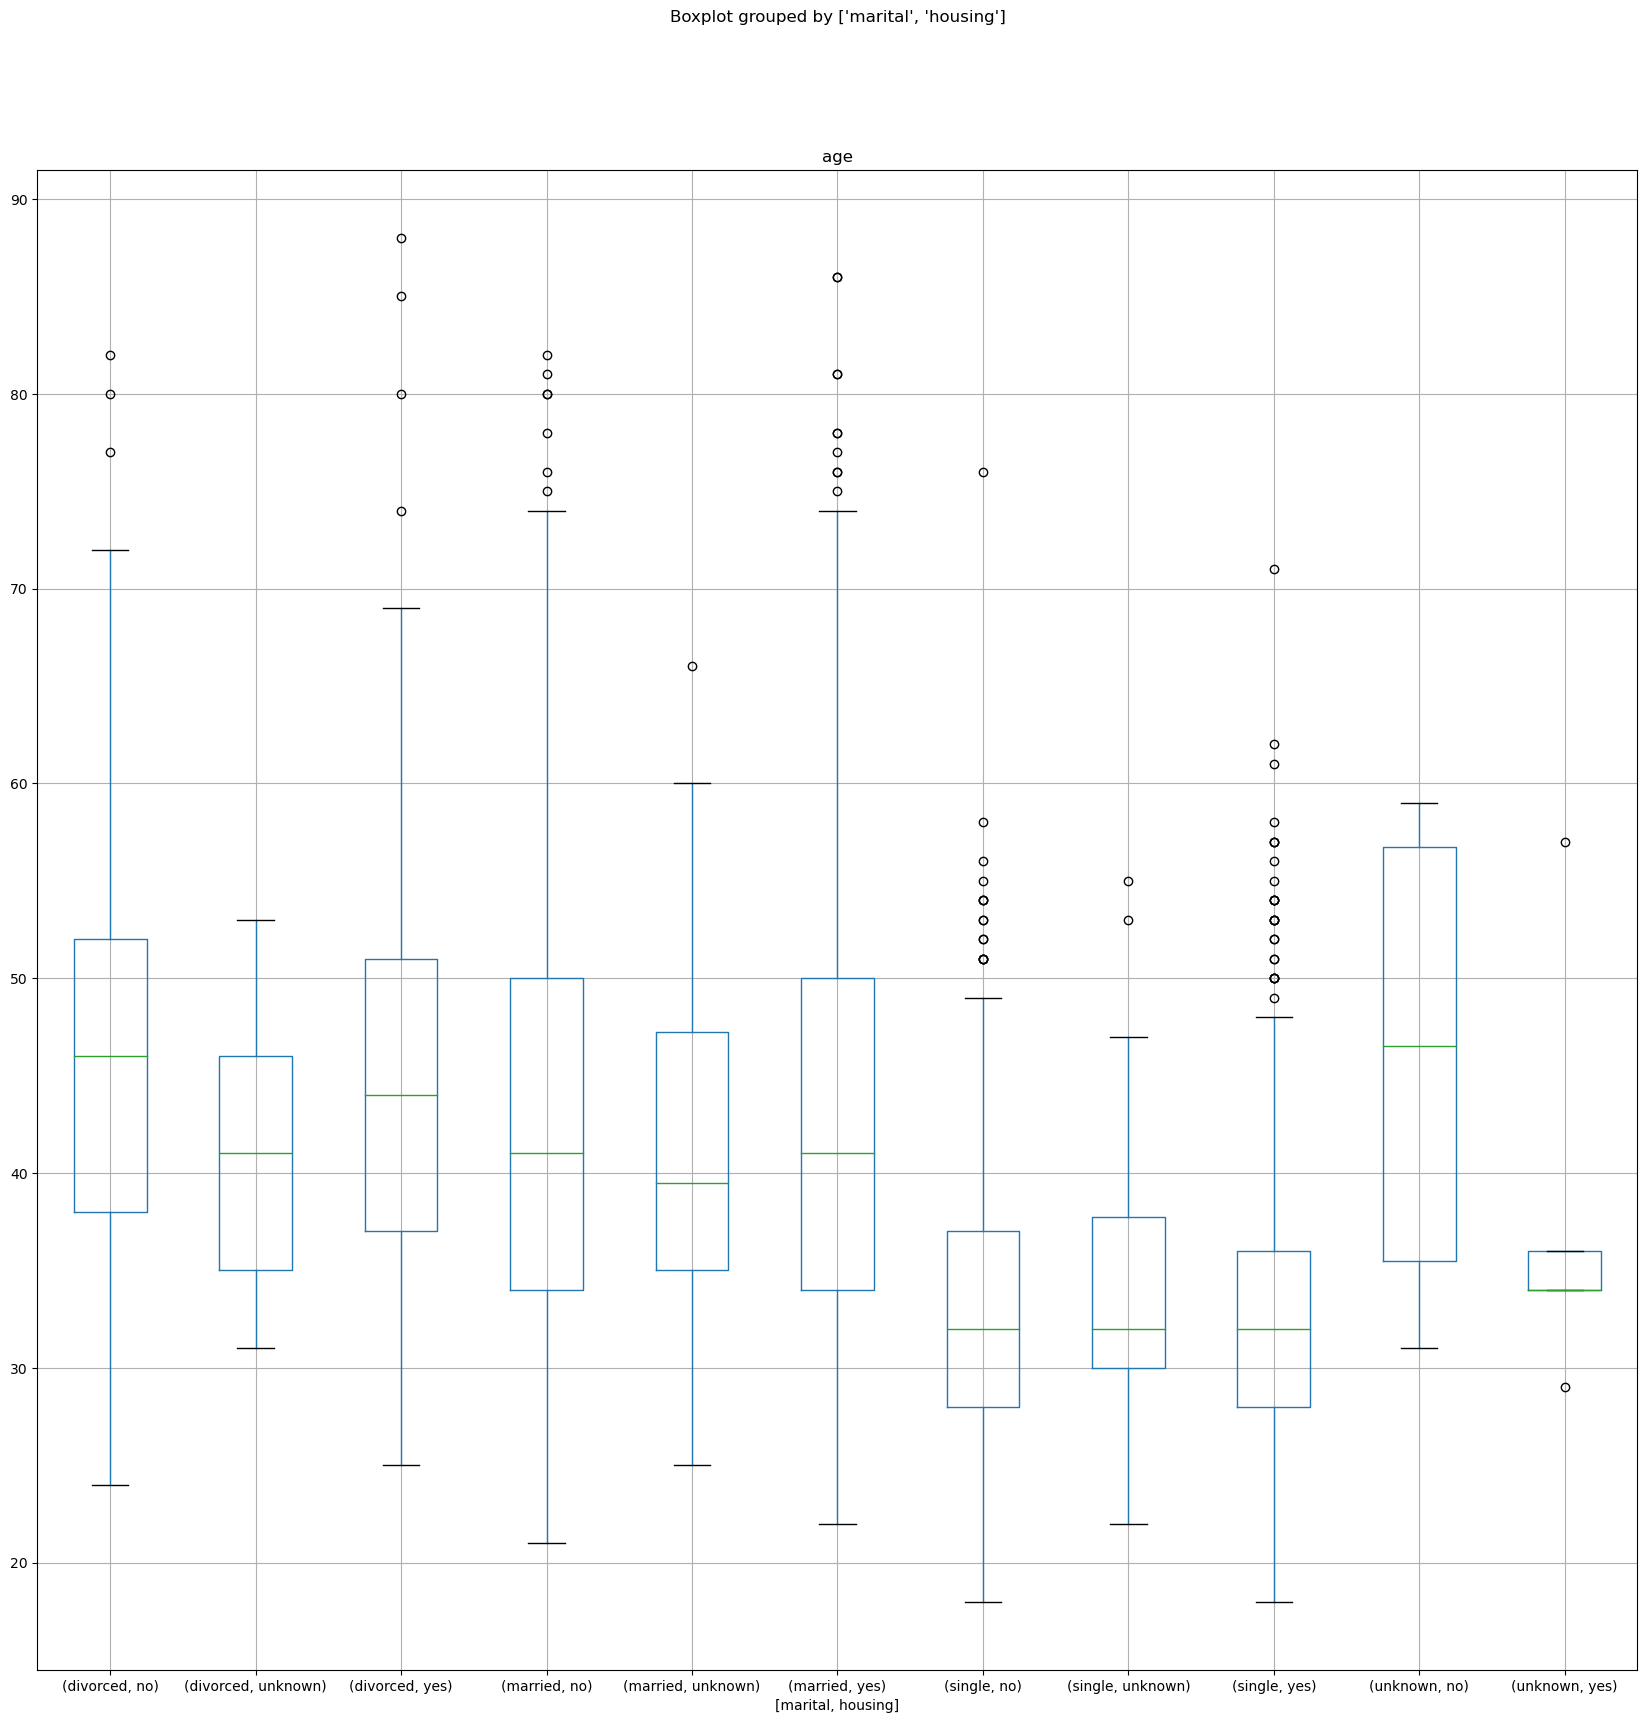

In [67]:
bank.boxplot(column = "age",
by = ["marital", "housing"],
figsize = (20, 20))
plt.show()

In [ ]:
The above boxplot showing a comparizon of age by marital status and housing shows that lowest avearge age for amrried people 
that got a housing loan is about 32 years and the highest averaging at about 55 years across the groups. Across all goups 
the range lies between 28 and 55 years for all groups, showig that housing loans are available to all groups in almost equal 
proportions. 

In [68]:
bank.sort_values(by = "campaign", ascending = False).head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2552,31,services,single,high.school,no,no,no,cellular,jul,thu,...,35,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
3564,25,admin.,single,basic.9y,no,no,no,cellular,jul,thu,...,29,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
3241,39,services,married,high.school,no,yes,no,cellular,jul,thu,...,29,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
56,29,admin.,single,university.degree,no,yes,no,telephone,jun,fri,...,27,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
2485,41,technician,married,high.school,no,yes,no,telephone,jun,fri,...,24,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
2988,45,services,married,professional.course,no,yes,no,cellular,jul,mon,...,23,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
2202,29,technician,married,university.degree,no,no,no,cellular,jul,thu,...,23,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
713,43,admin.,married,high.school,no,yes,no,cellular,jul,mon,...,22,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
3569,31,admin.,single,high.school,no,no,no,telephone,may,thu,...,22,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
886,56,technician,married,university.degree,unknown,no,no,cellular,jul,mon,...,19,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0


In [ ]:
This shows the list of the first ten clients with the highest number of campaigns, which ranges from 35, the highest 
and 19 the lowest for the top ten clients. 

In [69]:
bank.pivot_table(
["age", "campaign"],
["education"],
aggfunc = ["mean", "count"],
)

mean           count         
                           age  campaign   age campaign
education                                              
basic.4y             47.657343  2.421911   429      429
basic.6y             40.144737  2.649123   228      228
basic.9y             39.231707  2.348432   574      574
high.school          38.097720  2.630836   921      921
illiterate           42.000000  4.000000     1        1
professional.course  40.207477  2.512150   535      535
university.degree    39.017405  2.583070  1264     1264
unknown              42.826347  2.538922   167      167

In [ ]:
The avearge age for each education level is shown above, shwowing that the lowest average age is for high school degrees whicch
is at 38 years while those with university degree has the highest campaign count at 1264.

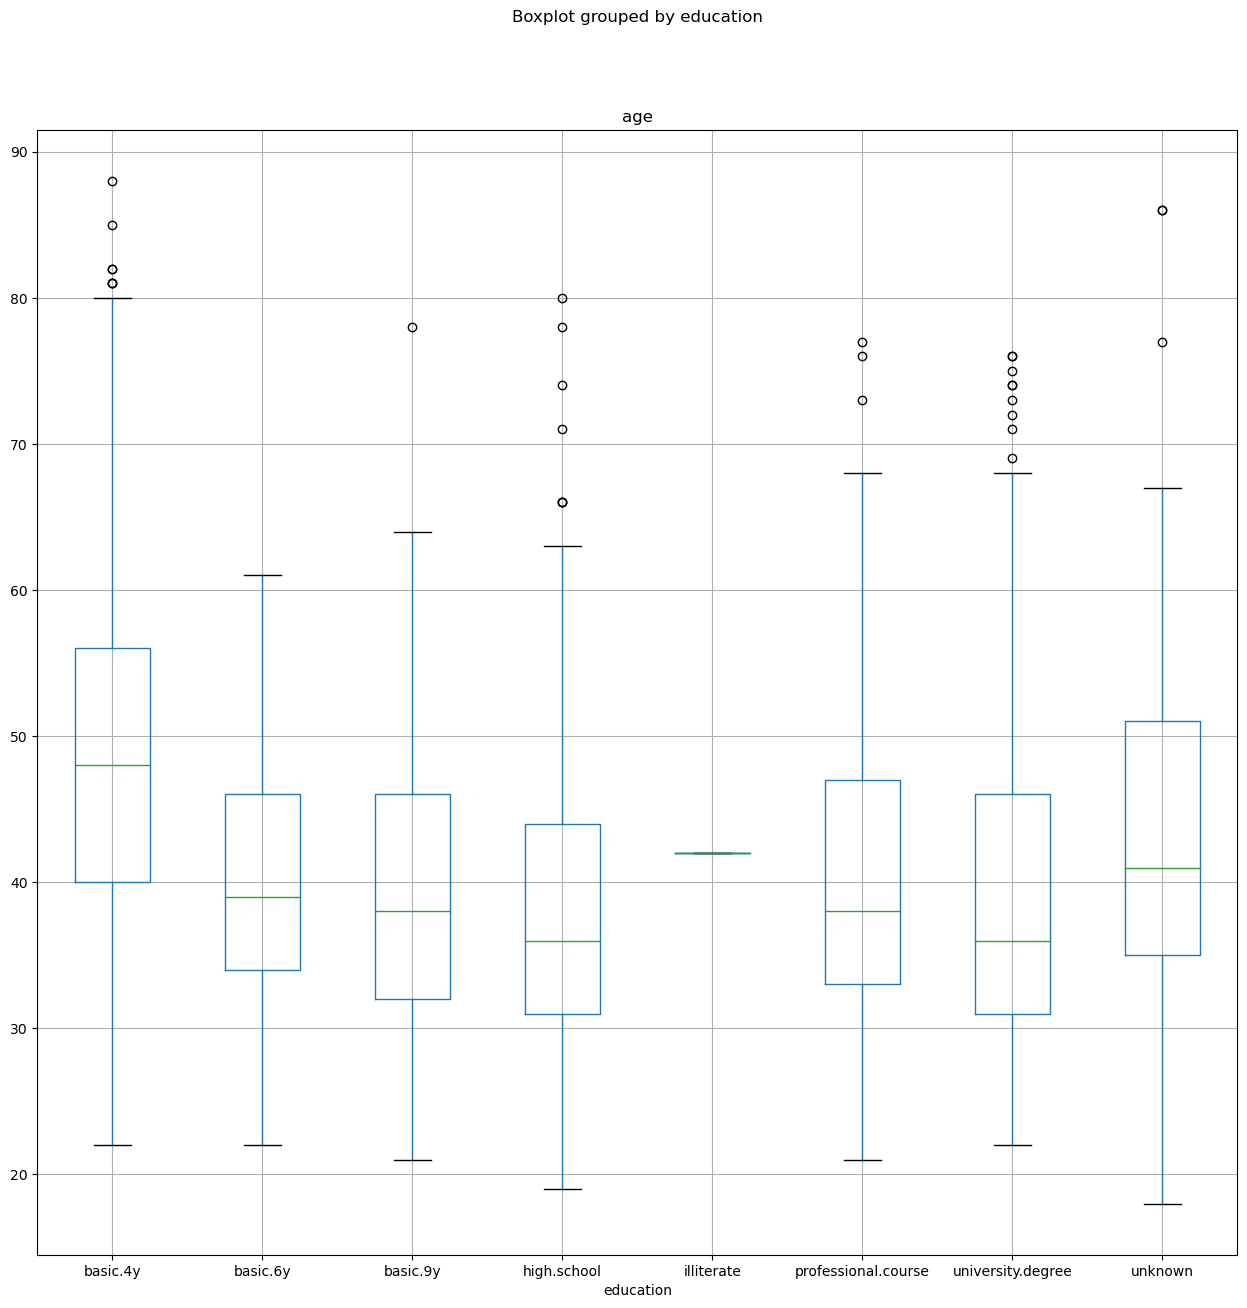

In [70]:
bank.boxplot(column = "age",
by = "education",
figsize = (15, 15))
plt.show()

## Insights and conclusion

In [ ]:
Analyzing the age distribution by their educational level shows that the lowest average age of 35 is for those that have a 
university degree, closely followed by those who have high school degrees. The highes average age is for those who have basic 4
education level, with an average age of 48 years. The high school degrees have the lowest lower quartile range apart from 
those that are unknown, basic 4 has the highest upper quartile range at 80 years for basic 4 holders and also the highest 
outlier set at around 88 years.